# 3.3 Neural Networks & Deep Learning

## 3.3.1 From Linear to Neural Networks

### Linear Score Function
$$ f = W \cdot x $$

### 2-layer Neural Network
$$ f = W_2 \cdot \text{ReLU}(W_1 \cdot x) $$

### 3-layer Neural Network
$$ f = W_3 \cdot \text{ReLU}(W_2 \cdot \text{ReLU}(W_1 \cdot x)) $$

### General N-layer Network
$$ f = W_n \cdot \text{ReLU}(W_{n-1} \cdot \text{ReLU}(...\text{ReLU}(W_1 \cdot x))) $$

## 3.3.2 Activation Functions

### ReLU (Rectified Linear Unit)
$$ \text{ReLU}(x) = \max(0, x) $$

### Sigmoid
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

### Tanh
$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

### Leaky ReLU
$$ \text{LeakyReLU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0 
\end{cases} $$

## 3.3.3 Universal Approximation Theorem

For a continuous function $h(x)$ on compact subset $S \subseteq \mathbb{R}^d$, and any $\epsilon > 0$:
$$ \exists \text{ NN } f(x): |h(x) - f(x)| < \epsilon, \forall x \in S $$

## 3.3.4 Network Architecture Components

### Layer Size
For layer $l$ with $n_l$ neurons:
$$ \text{Output}_l = W_l \cdot \text{Input}_l + b_l $$
where $W_l \in \mathbb{R}^{n_l \times n_{l-1}}$, $b_l \in \mathbb{R}^{n_l}$

### Loss Function with Regularization
$$ L_{\text{total}} = L_{\text{data}} + \lambda \sum_{i=1}^n \|W_i\|^2 $$

### Forward Pass Computation
For each layer $l$:
$$ z^{(l)} = W^{(l)}a^{(l-1)} + b^{(l)} $$
$$ a^{(l)} = \text{activation}(z^{(l)}) $$

### Gradients with Backpropagation
$$ \frac{\partial L}{\partial W^{(l)}} = \frac{\partial L}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial W^{(l)}} $$
$$ \frac{\partial L}{\partial b^{(l)}} = \frac{\partial L}{\partial z^{(l)}} $$

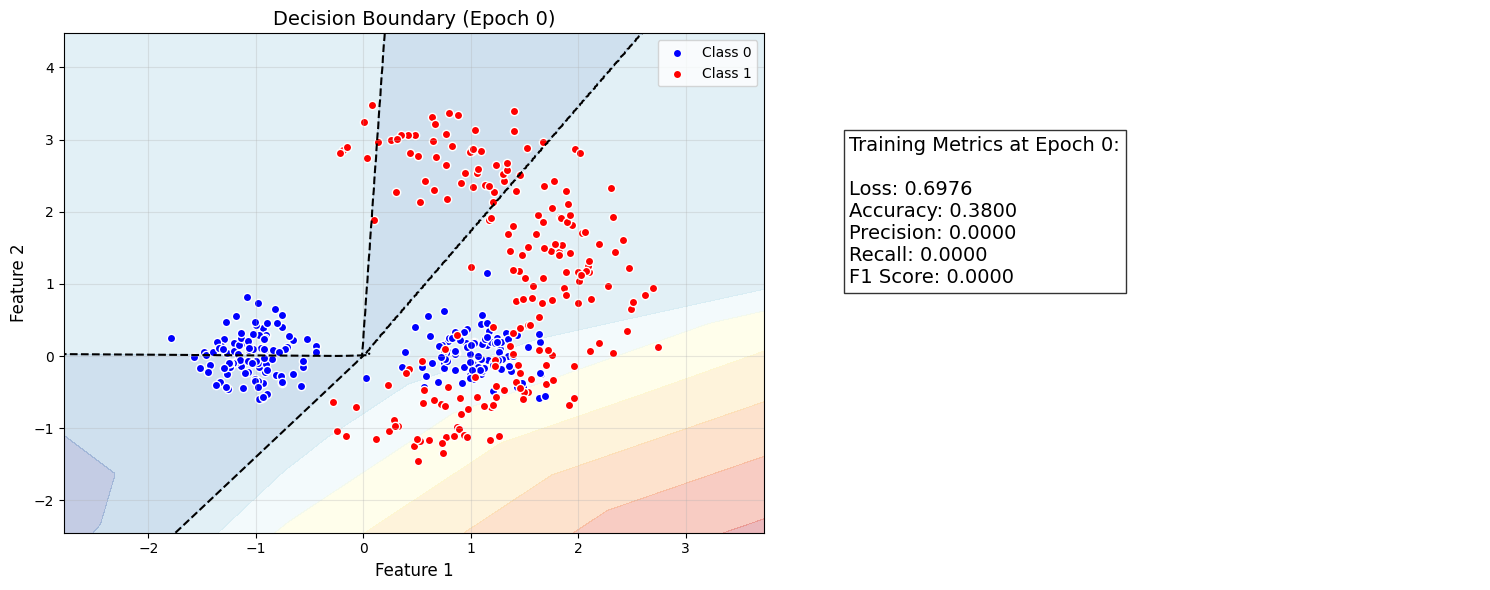

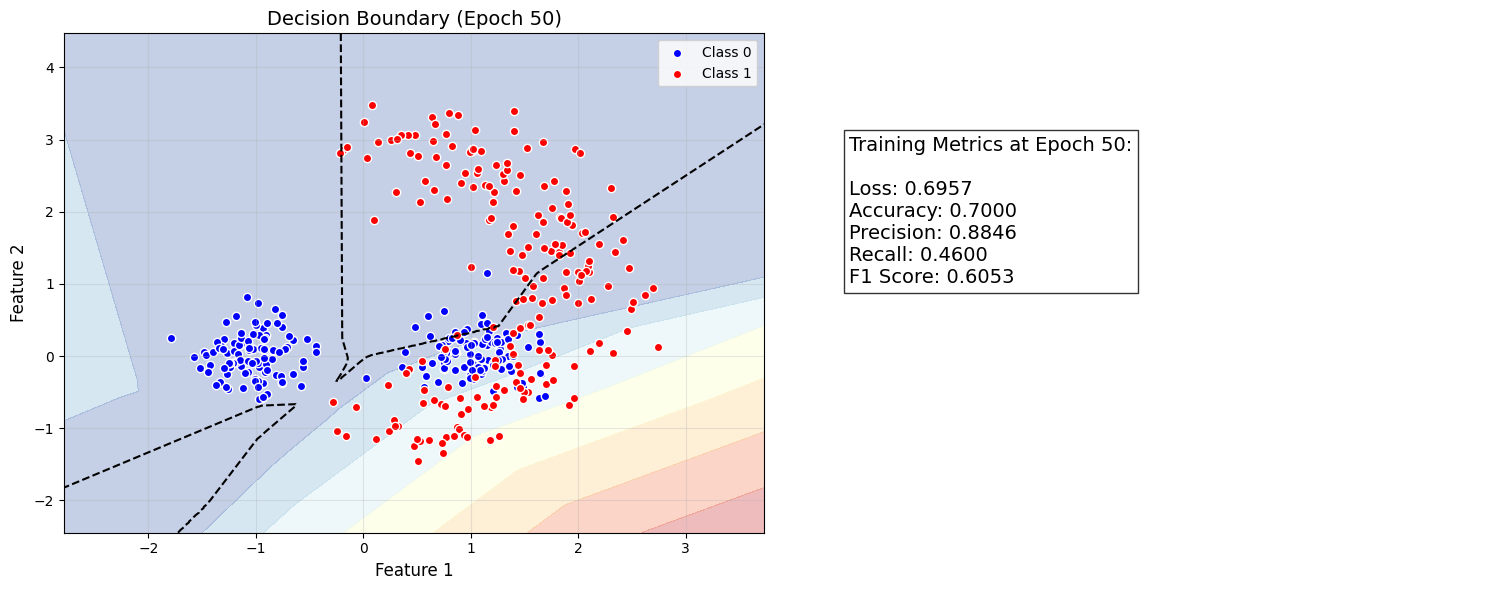

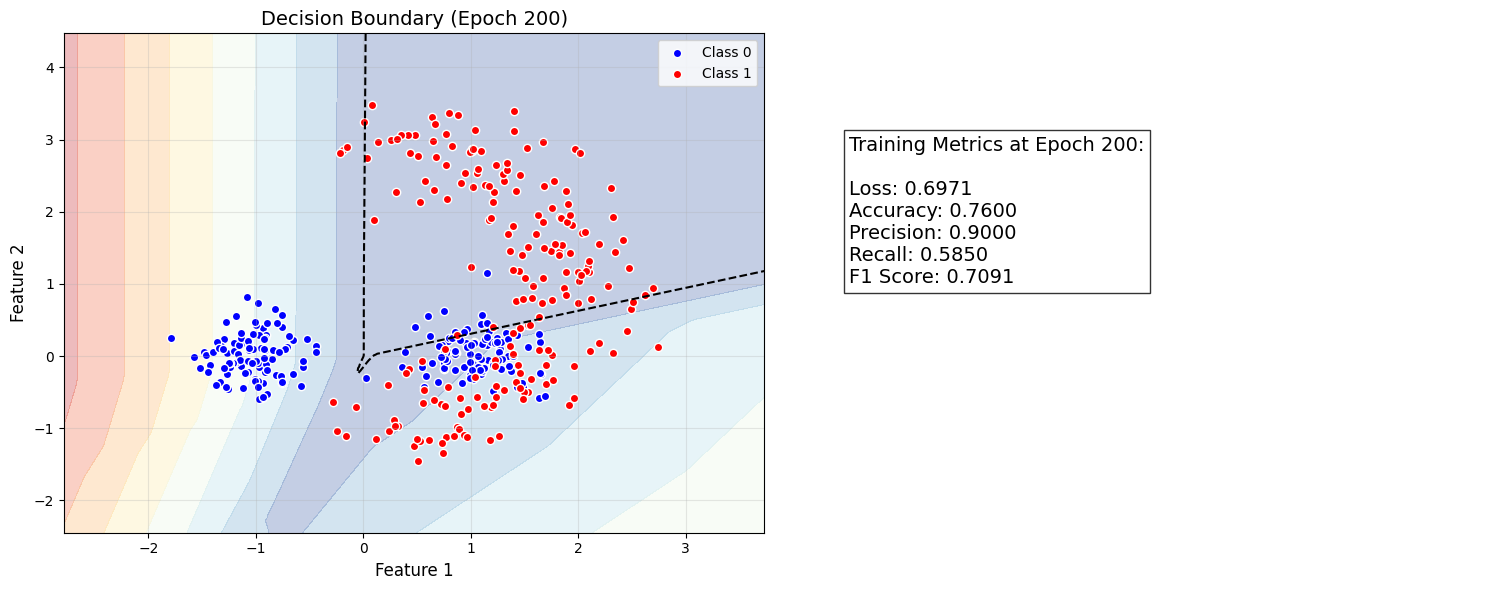

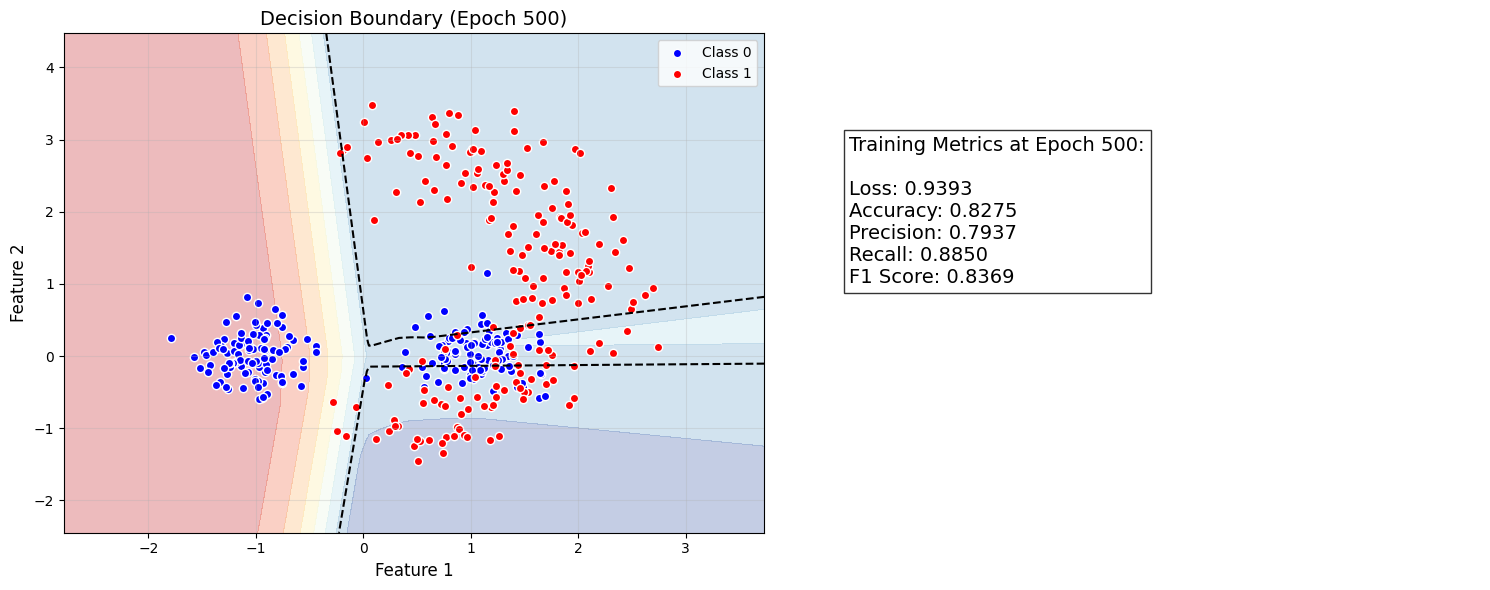

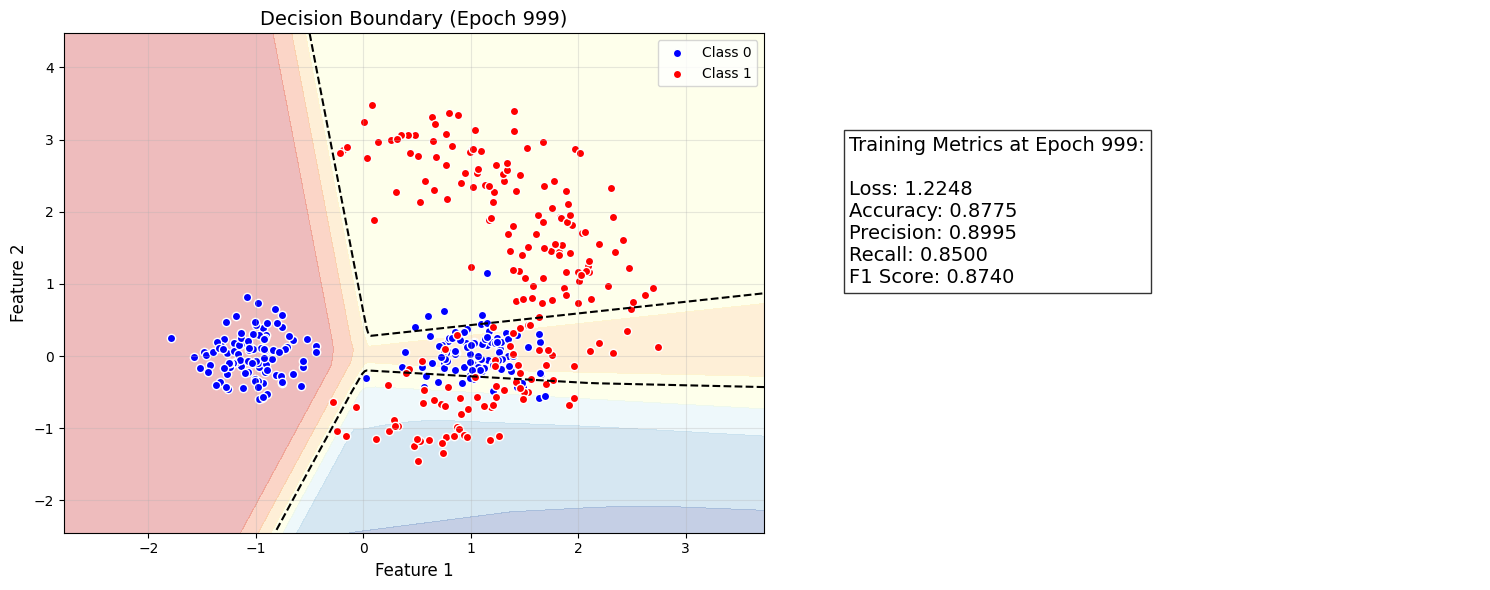

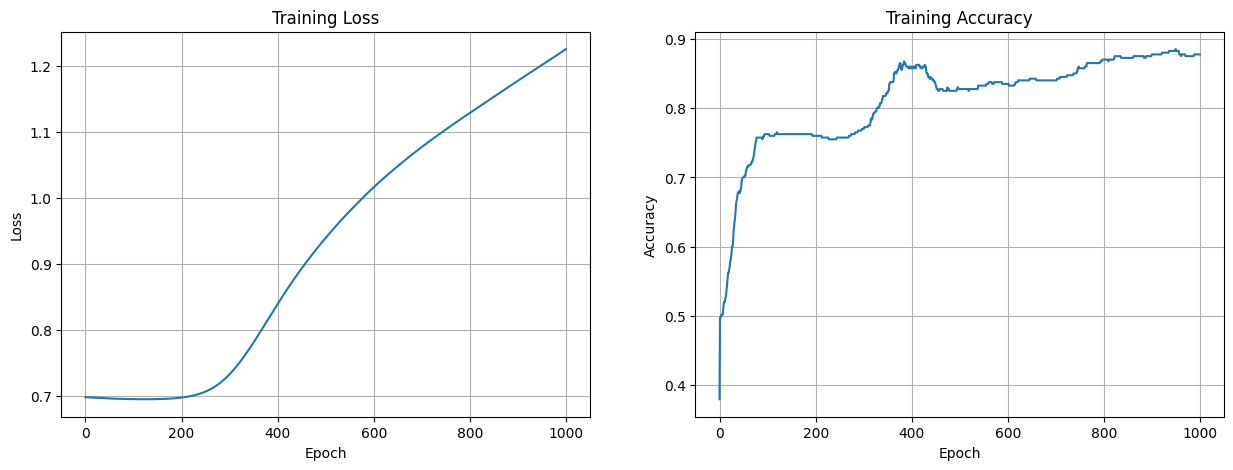

In [ ]:
from NNFunctions import *
if __name__ == "__main__":
    train_and_visualize()


##### Step by step visualization

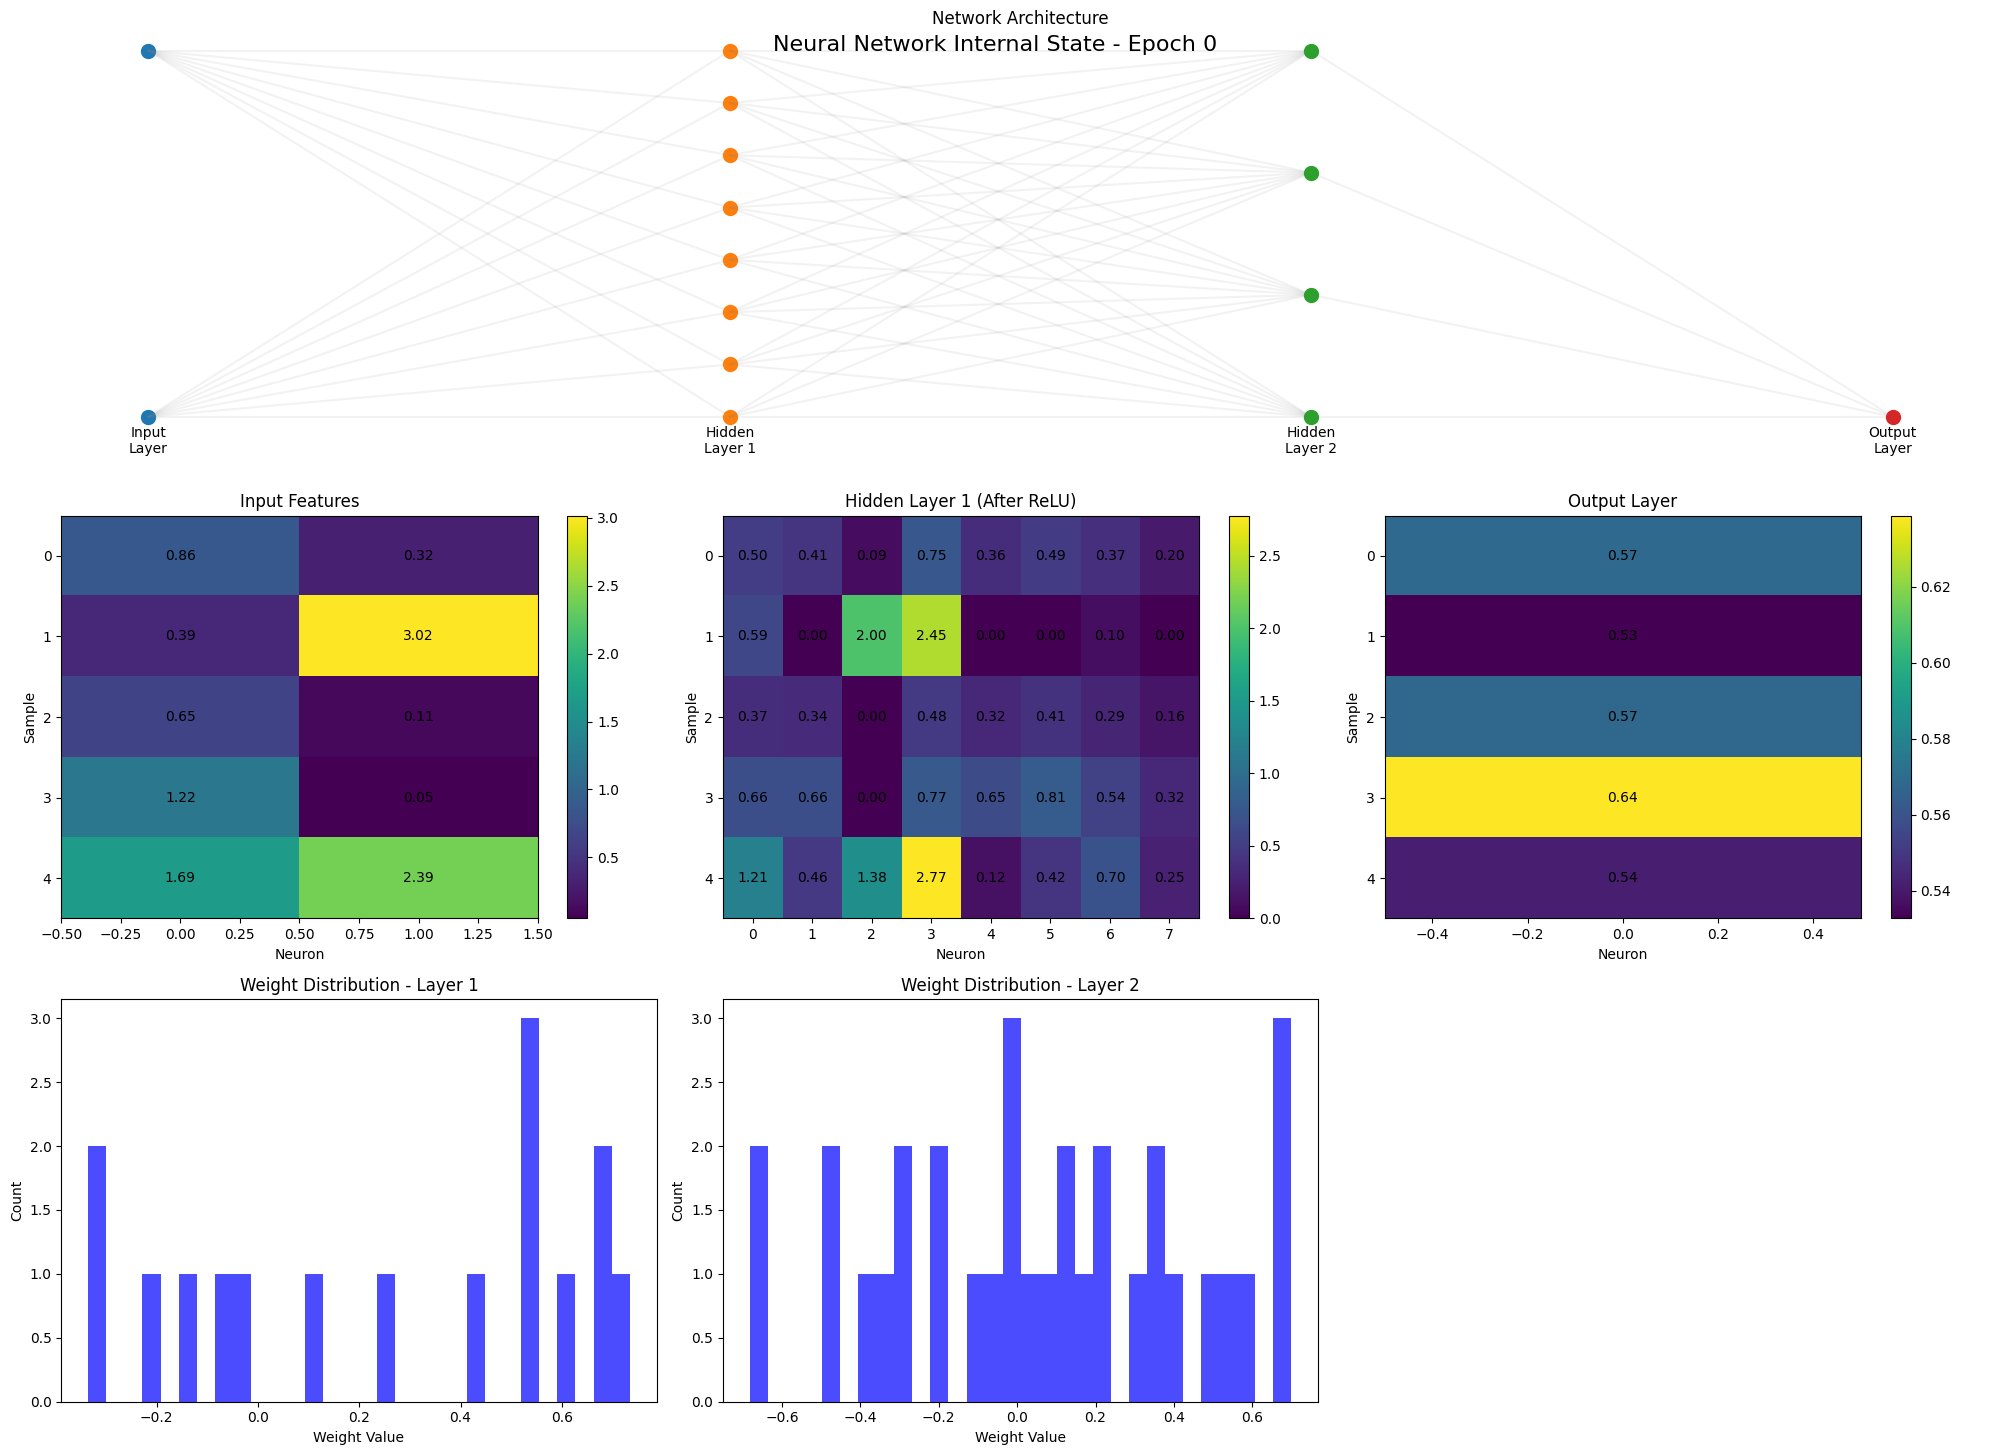

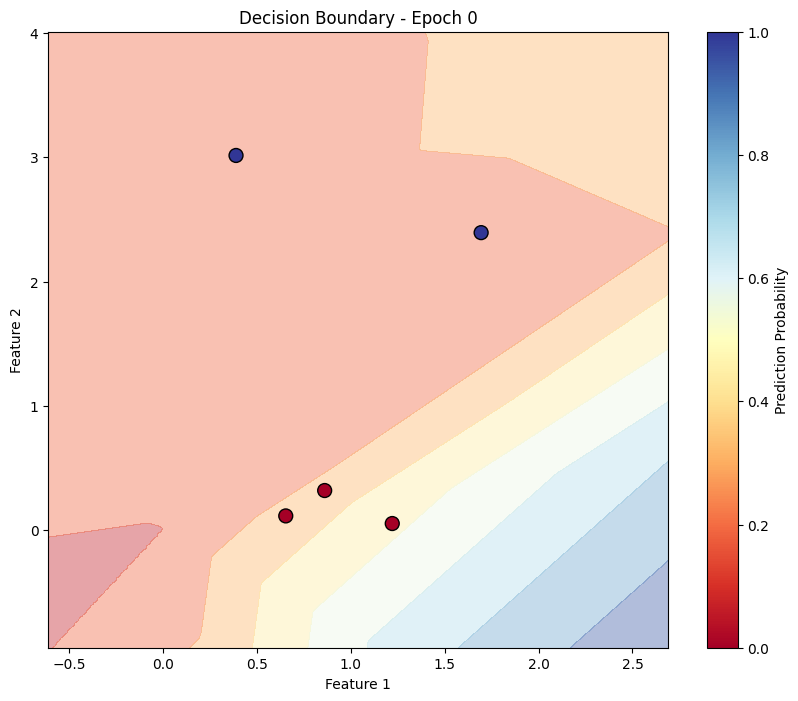

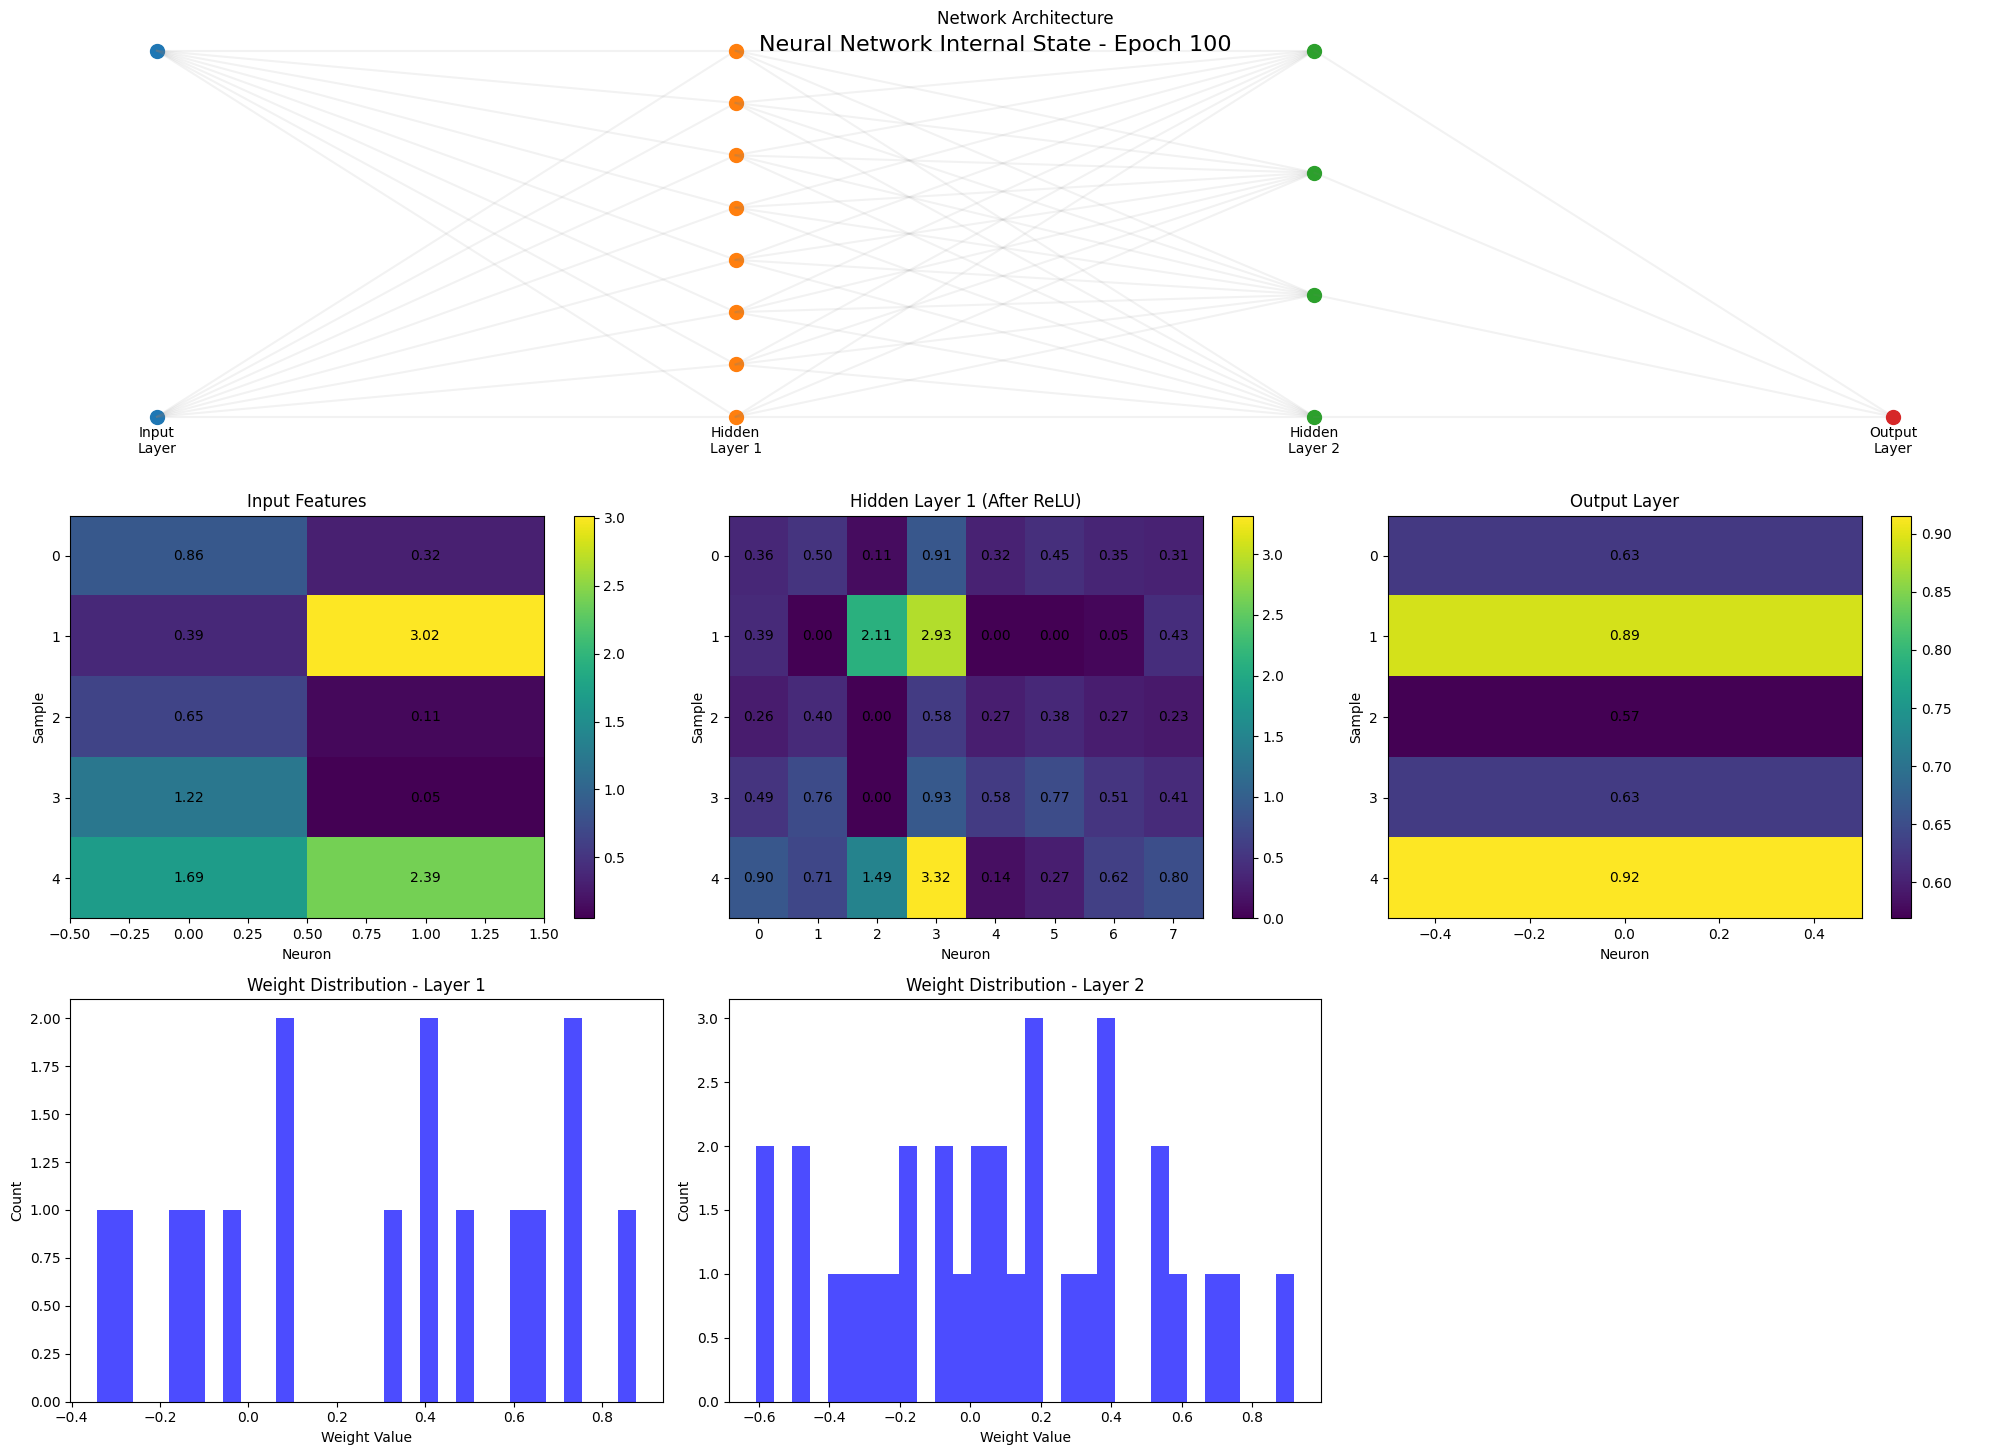

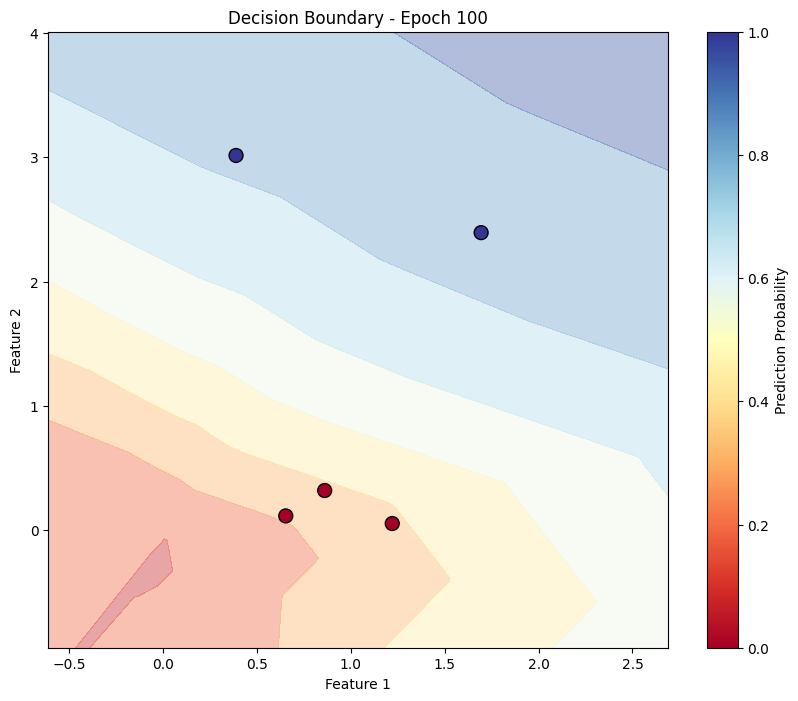

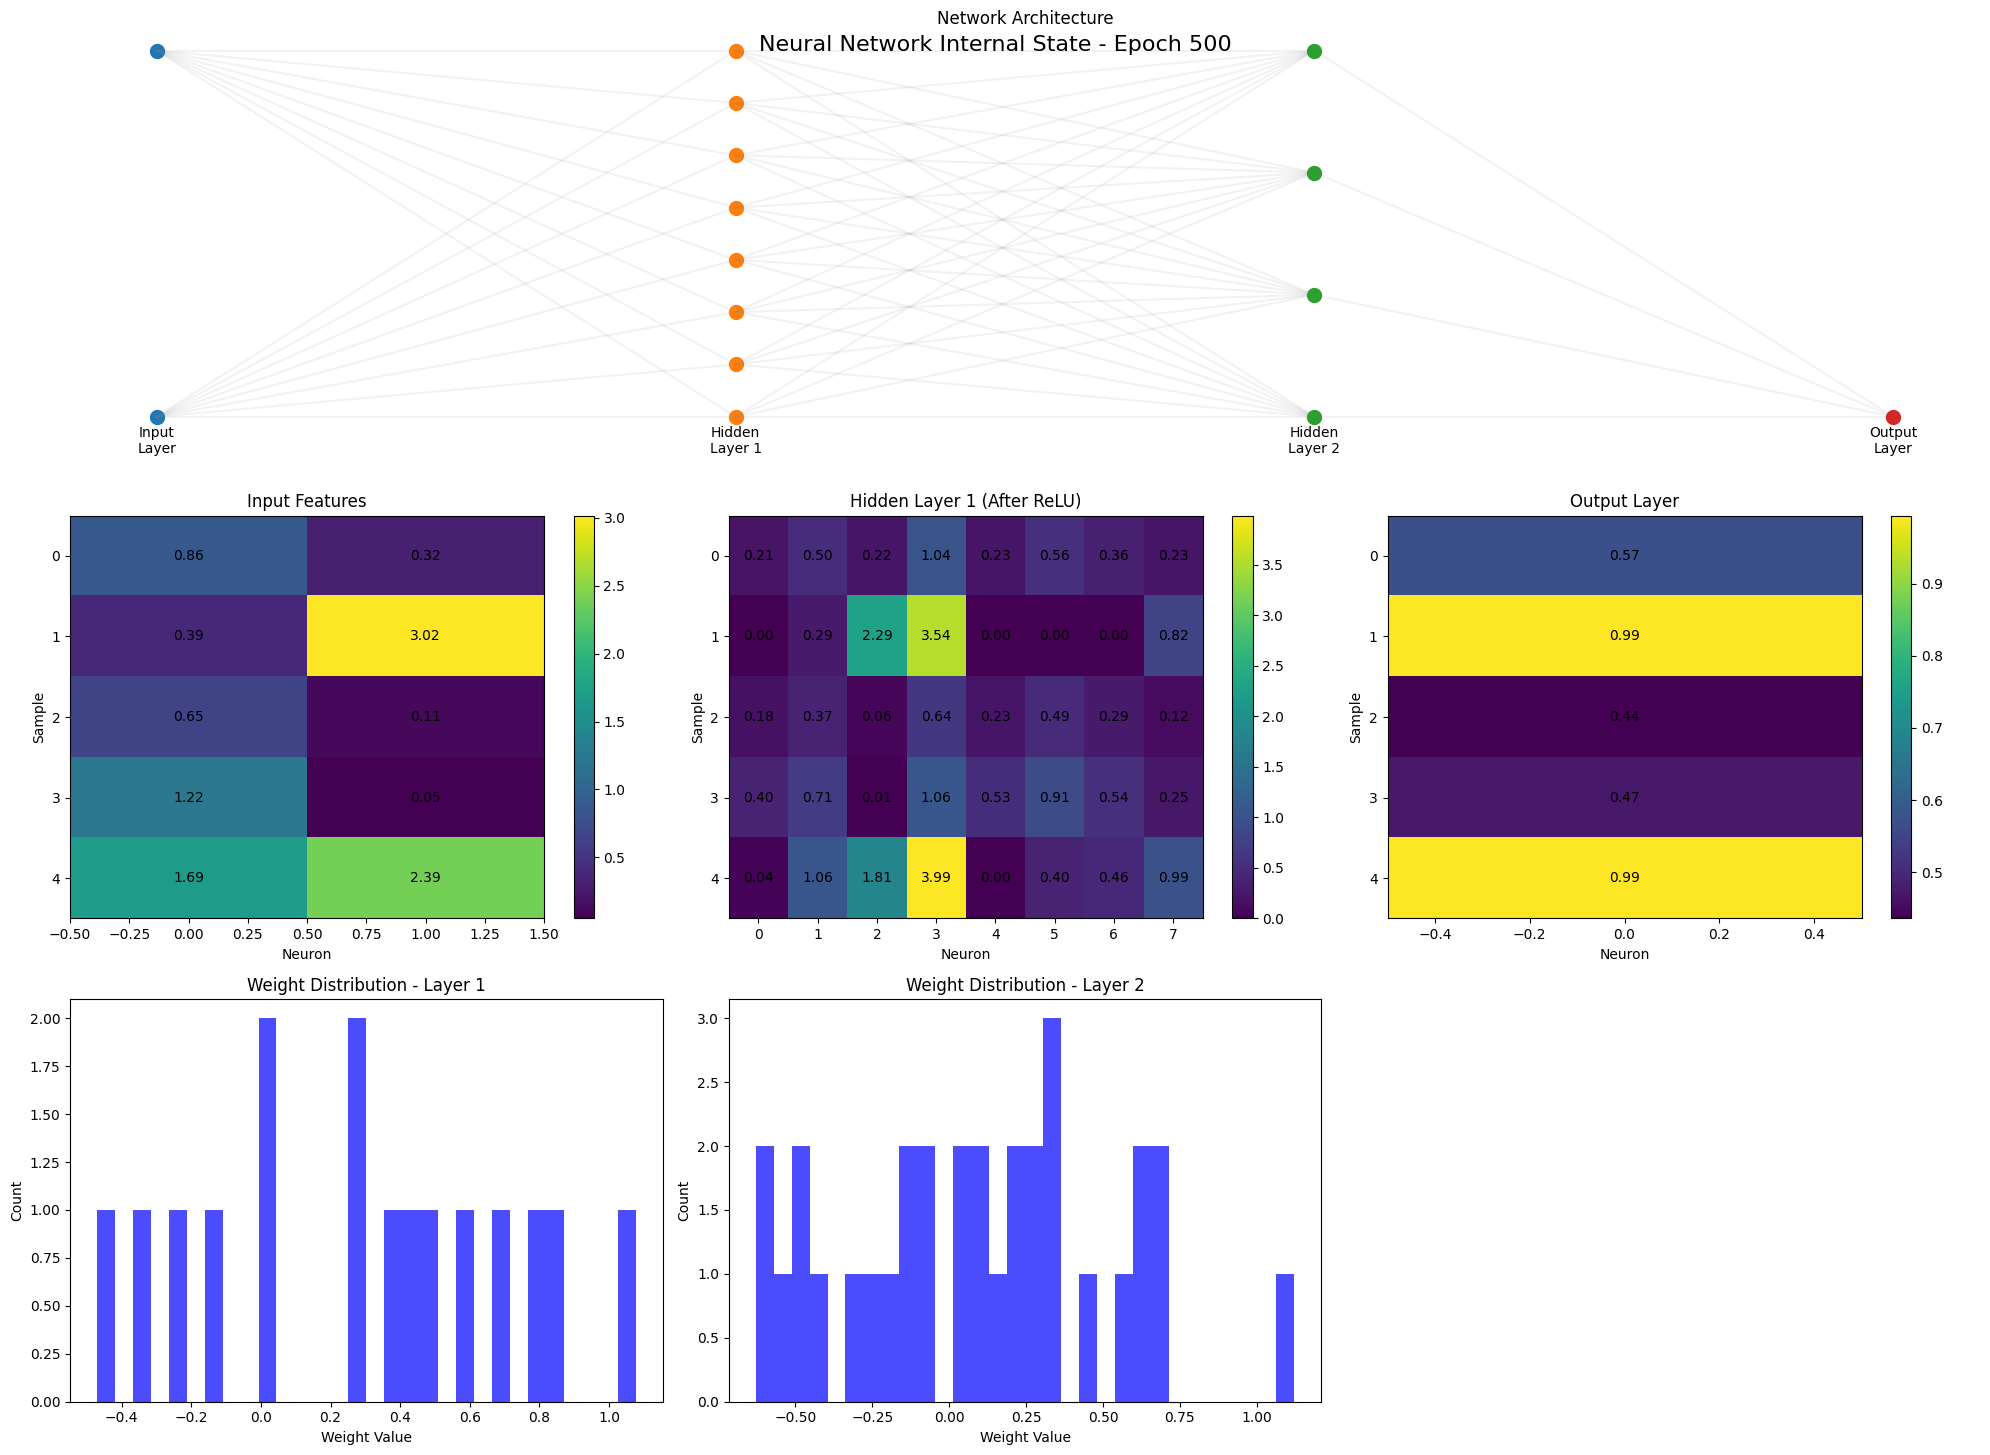

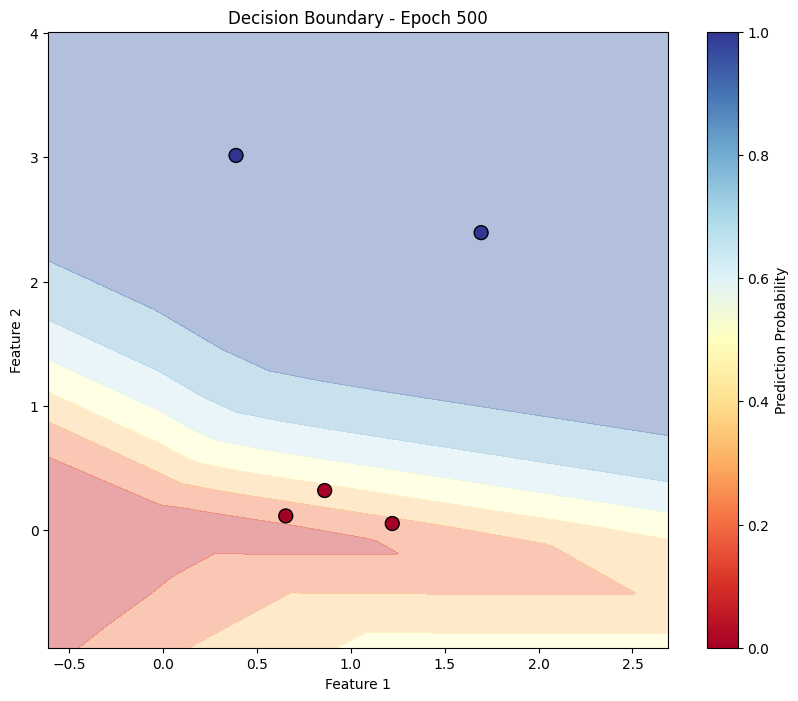

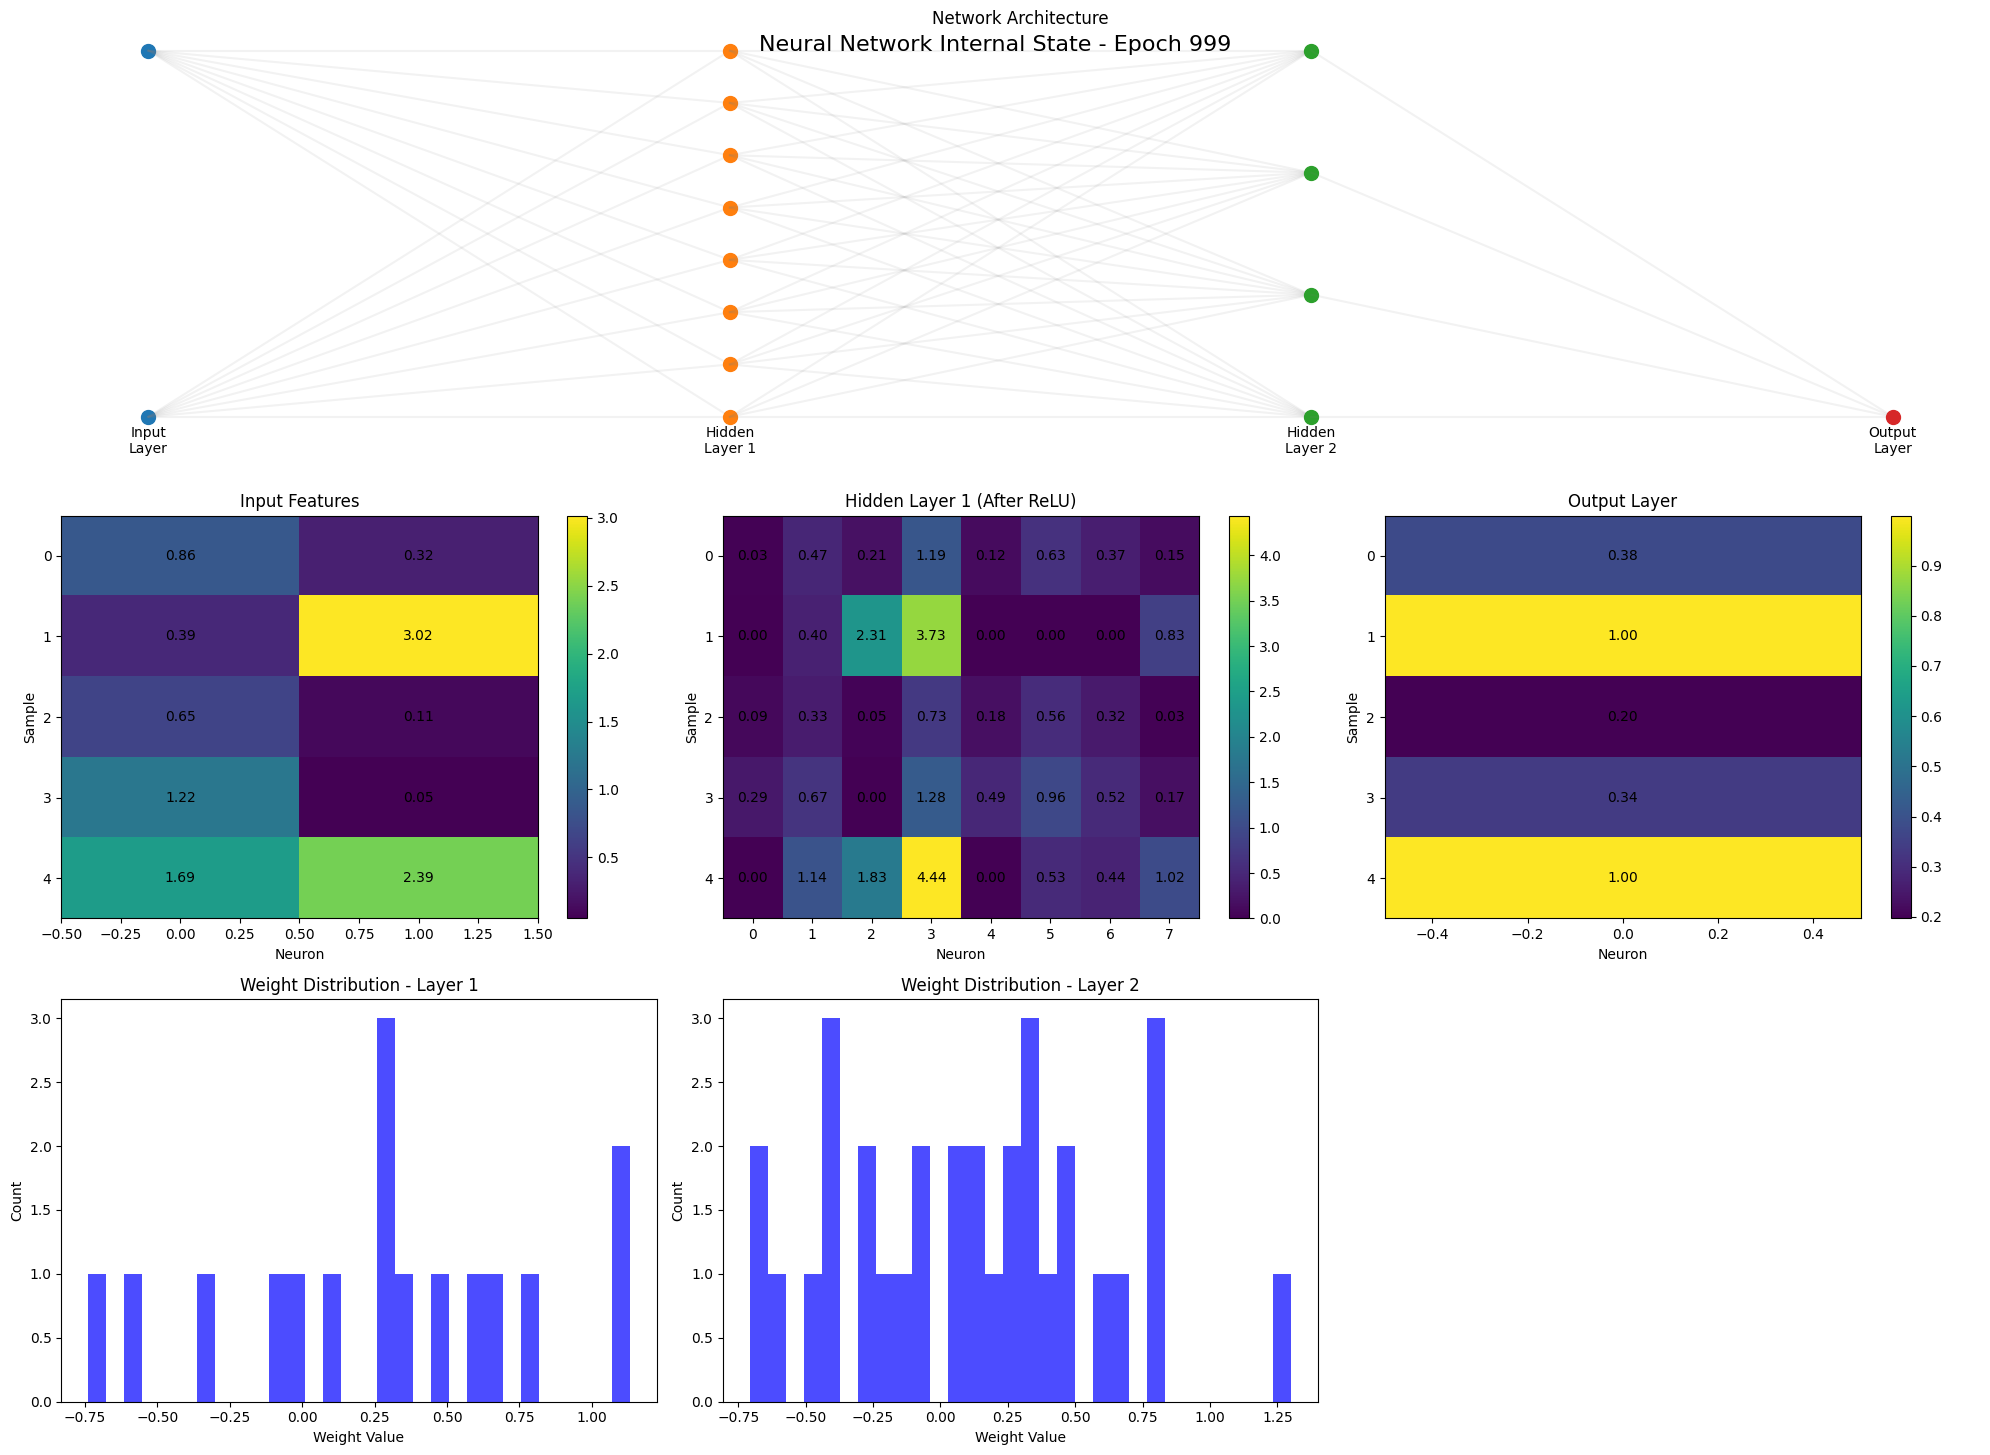

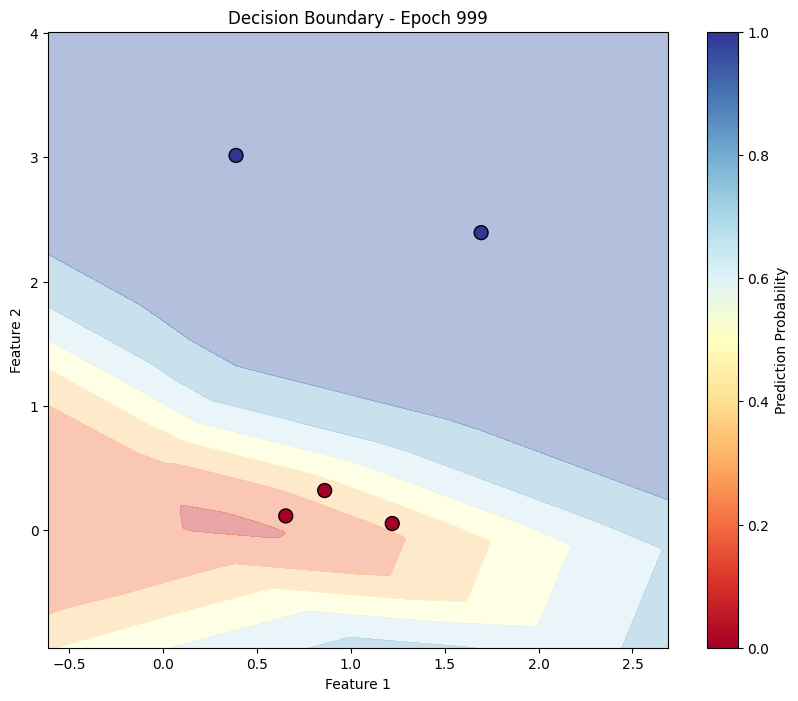

In [18]:
# Run training
train_with_visualization()

##### **Network Architecture Overview**
**Input Layer**: 2 neurons (features)
- Shows raw input data (2 features per sample)
- Values range from ~0.3 to 3.0
- Sample 1 has higher values in feature 2 (3.02)
- No change between epochs (input stays constant)

**Hidden Layer 1**: 8 neurons with ReLU activation

Epoch 0:
- Initial random activation pattern
- Some neurons are "dead" (dark purple = 0 activation)
- Maximum activation ~2.77
- Scattered activation pattern

Epoch 100:
- More structured activation pattern
- Higher maximum activations (~3.32)
- More neurons are actively contributing
- Clearer patterns emerging in neuron responses

**Hidden Layer 2**: 4 neurons with ReLU activation

Epoch 0:

- Outputs around 0.54-0.64 (near random)
- Little differentiation between classes

Epoch 100:
- Outputs more polarized (0.37-0.92)
- Clear separation between classes
- Higher confidence predictions (closer to 0 or 1)

**Weight Distribution Analysis**

Layer 1 Weight

  Epoch 0:
  - Roughly uniform distribution
  - Weights centered around 0
  - Range: -0.2 to 0.6

  Epoch 100:
  - More structured distribution
  - Larger positive weights
  - Range expanded: -0.4 to 0.8
  - Clear peaks forming

Layer 2 Weights

  Epoch 0:
  - Scattered distribution
  - Multiple small peaks

  Epoch 100:
  - More organized distribution
  - Clearer pattern of weight values
  - Concentrated around certain values

**Output Layer**: 1 neuron (binary classification)

### **Techniques Used in improved NN Implementation**


#### **1. Xavier Initialization**
- **Purpose**: Ensures proper weight initialization for stable gradients during training.
- **Explanation**:
  - Weights are initialized using a uniform distribution in the range:
    $$
    W_l \sim \mathcal{U} \left(-\sqrt{\frac{6}{n_{l} + n_{l+1}}}, \sqrt{\frac{6}{n_{l} + n_{l+1}}} \right)
    $$
  - Where $n_{l}$ and $n_{l+1}$ are the number of neurons in layer $l$ and $l+1$, respectively.

---

#### **2. ReLU Activation Function**
- **Purpose**: Introduces non-linearity while avoiding vanishing gradients.
- **Formula**:
    $$
    \text{ReLU}(x) = \max(0, x)
    $$
- **Derivative**:
    $$
    \text{ReLU}'(x) = 
    \begin{cases} 
    1 & \text{if } x > 0 \\
    0 & \text{if } x \leq 0
    \end{cases}
    $$

---

#### **3. Batch Normalization**
- **Purpose**: Stabilizes training by normalizing layer inputs, allowing higher learning rates and faster convergence.
- **Forward Pass**:
    $$
    \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}, \quad y = \gamma \hat{x} + \beta
    $$
  - $\mu$: Mean of the batch.
  - $\sigma^2$: Variance of the batch.
  - $\gamma, \beta$: Learnable scale and shift parameters.
  - $\epsilon$: Small constant for numerical stability.
- **Backward Pass**:
  - Computes gradients for $\gamma$, $\beta$, and inputs using the chain rule.

---

#### **4. Momentum-Based Optimization**
- **Purpose**: Accelerates gradient descent by smoothing updates.
- **Formula**:
    $$
    v_t = \beta v_{t-1} - \eta \nabla J(W_t), \quad W_{t+1} = W_t + v_t
    $$
  - $v_t$: Velocity update.
  - $\beta$: Momentum coefficient.
  - $\eta$: Learning rate.
  - $\nabla J(W_t)$: Gradient of the loss function with respect to weights at time $t$.

---

#### **5. L2 Regularization**
- **Purpose**: Prevents overfitting by penalizing large weights.
- **Regularization Term**:
    $$
    \frac{\lambda}{2m} \sum_{i=1}^{n} W_i^2
    $$
  - $\lambda$: Regularization strength.
  - $m$: Number of samples.
  - $W_i$: Weight parameter.

---

#### **6. Sigmoid Activation for Output Layer**
- **Purpose**: Converts output logits into probabilities for binary classification.
- **Formula**:
    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$
  - $\sigma(z)$: Sigmoid activation function output.
  - $z$: Input to the sigmoid function.

---

#### **7. Binary Cross-Entropy Loss**
- **Purpose**: Measures the error in binary classification tasks.
- **Formula**:
    $$
    L = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
    $$
  - $y_i$: Ground truth label.
  - $\hat{y}_i$: Predicted probability.
  - $m$: Number of samples.

---

#### **8. Dropout Regularization**
- **Purpose**: Reduces overfitting by randomly dropping units during training.
- **Formula**:
    $$
    A^{(l)}_{\text{drop}} = A^{(l)} \odot D^{(l)}, \quad D^{(l)} \sim \text{Bernoulli}(p)
    $$
  - $A^{(l)}$: Activation from layer $l$.
  - $D^{(l)}$: Dropout mask sampled from a Bernoulli distribution with probability $p$.
  - $\odot$: Element-wise multiplication.

---

#### **9. Forward Pass with Layer-Wise Dropout**
- **Implementation**:
  - For hidden layers, ReLU is applied, followed by batch normalization and dropout.
  - Final layer uses sigmoid activation for binary classification without dropout.

---

#### **10. Backward Pass with Gradients**
- **Gradient Computation**:
  - Gradients are computed layer by layer in reverse, using the chain rule.
  - For the final layer:
    $$
    dZ^{(L)} = A^{(L)} - Y
    $$
    $$
    dW^{(L)} = \frac{1}{m} A^{(L-1)T} dZ^{(L)}, \quad db^{(L)} = \frac{1}{m} \sum dZ^{(L)}
    $$
  - For hidden layers:
    $$
    dZ^{(l)} = dA^{(l)} \cdot \text{ReLU}'(Z^{(l)}), \quad dW^{(l)} = \frac{1}{m} A^{(l-1)T} dZ^{(l)}
    $$

---

#### **11. Training Loop with Momentum**
- **Training Process**:
  - Forward pass computes predictions.
  - Loss and gradients are computed.
  - Weights and biases are updated using momentum:
    $$
    v_{W^{(l)}} = \beta v_{W^{(l)}} - \eta (dW^{(l)} + \lambda W^{(l)}), \quad W^{(l)} = W^{(l)} + v_{W^{(l)}}
    $$
    $$
    v_{b^{(l)}} = \beta v_{b^{(l)}} - \eta db^{(l)}, \quad b^{(l)} = b^{(l)} + v_{b^{(l)}}
    $$


Epoch 0: Loss = 0.7435, Accuracy = 0.5325
Epoch 100: Loss = 0.7550, Accuracy = 0.6225
Epoch 200: Loss = 0.7846, Accuracy = 0.6975
Epoch 300: Loss = 0.8439, Accuracy = 0.7400
Epoch 400: Loss = 0.8720, Accuracy = 0.7475
Epoch 500: Loss = 0.9024, Accuracy = 0.7750
Epoch 600: Loss = 0.9372, Accuracy = 0.7800
Epoch 700: Loss = 0.9967, Accuracy = 0.7625
Epoch 800: Loss = 1.0190, Accuracy = 0.7875
Epoch 900: Loss = 1.0504, Accuracy = 0.7950


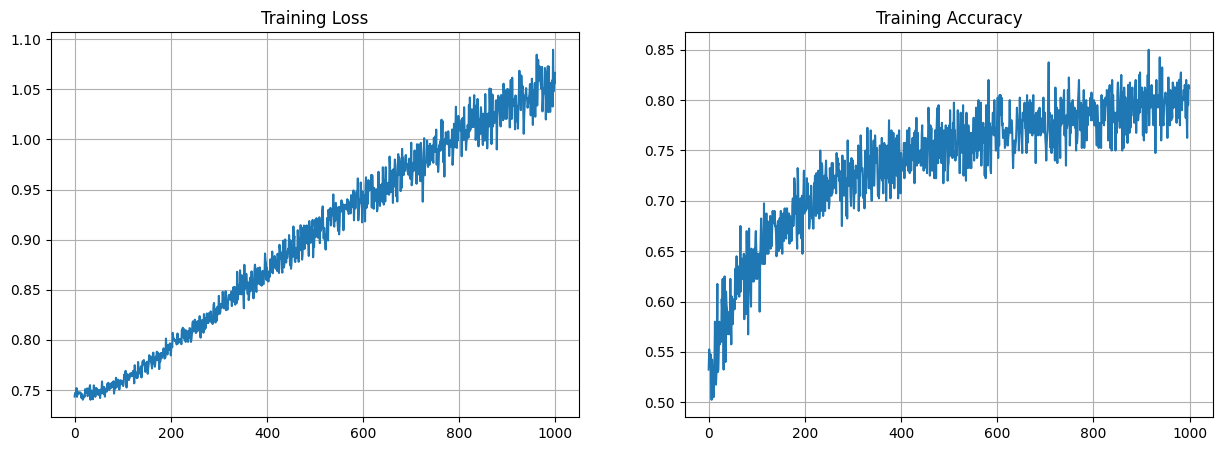

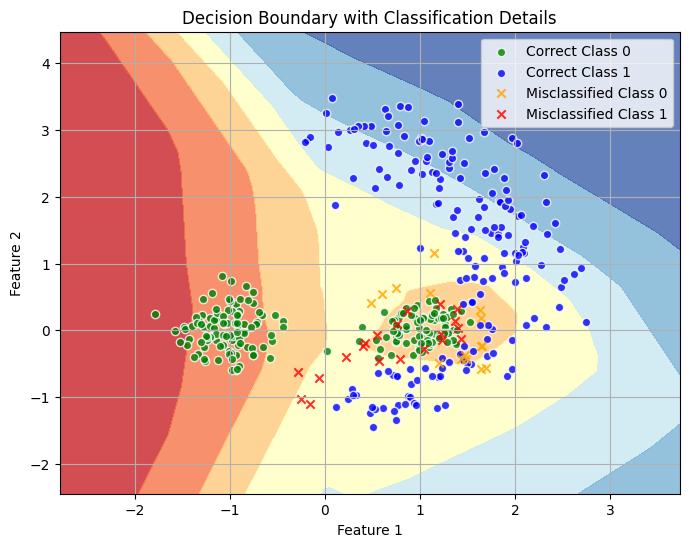

In [58]:
if __name__ == '__main__':
    main()


### **Interpretation of the Graph**
- **Correctly Classified Points**:
  - Most points in the inner regions of each class are classified correctly, indicating that the model has learned to distinguish the central areas of the two classes well.

- **Misclassified Points**:
  - Misclassifications primarily occur near the boundary between the two classes, where the data distribution overlaps. This is expected for datasets with non-linear separability and noise.

- **Decision Boundary**:
  - The decision boundary shows the regions where the model transitions from predicting Class 0 to Class 1. The smooth gradient of the boundary demonstrates that the model has learned a non-linear decision function.